In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Learning by doing. Learning Pandas with Pokemon!

In [2]:
df=pd.read_csv('Pokemon.csv')
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


### Shape
- `df.columns`  return list of column names
- `df.shape` return shape of pd.DataFrame (#rwos, #cols)

### Indexing
- `df[["Name", "Type 1"]]` return the two cols as pd.DataFrame
- `df.loc[0]` return first row as pd.Series

### Slicing
- `df.loc[0:10]` return rows 0-10

### Conditionals
- `df[((df['Type 1']=='Ice') | (df['Type 1']=='Ghost')) & (((df['Type 2']=='Ghost') | (df['Type 2']=='Ice')))]` return df with rows dropped where the conditionals are not fulfilled
- `df[df.index.str.contains("Cha")]` return rows that contain the string "cha" in their index as pd.Series

### sorting and counting
- `df.sort_values('Total',ascending=False)` returns df sorted by the values in the col "Total"
- `df['Type 1'].value_counts()` returns pd.Series with index: value, values: occurance along the whole col 

### dropping
- `df.drop(['Name'], axis=1)` return df without the col 'Name'
- `df.drop([0], axis=0)`  return df without row "0"

### Null Values
- `df.isna()` return mask of df with True where Null values
- `df["Type 2"].dropna()`  return df without rows there type 2 is null
- `df.fillna(3)`  return df with all null values replaced with 3
- `df.isna().any()` return pd.Series with index: column name, values: True if the column contains missing values, else False

### Aggregation Functions
- `df['HP'].max()`  return maximum value in row hp (also min, mean, std, median)
- `df.loc[df['HP'].idxmax()]`  return row with index ov max value in col 'HP'

### uniques
- `df['Type 1'].unique()` returns list of all unique items in the col 




### create new columns
- `df["new_col"] = new_col` appends a new col to pd.DataFrame
- returns a pd.Series

In [3]:
def attack(row):
    attack=row["Attack"]
    if attack > 100:
        return "strong"
    return "weak"

# df.apply(attack, axis=1)

### groupby
- `df.groupby("Generation")` returns groupby object, iteratable with `for group_name, group_df in groupby`
- `df.groupby("Generation")["Speed"].mean()` returns pd.Series with index=generation_id, value=mean of col "Speed" per generation (split into groups, apply aggregation, combine to a series)

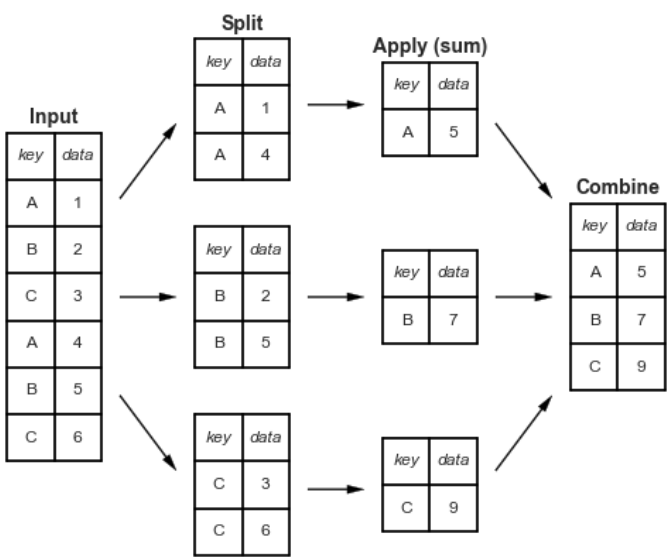

### countplot

<AxesSubplot:xlabel='Type 1', ylabel='count'>

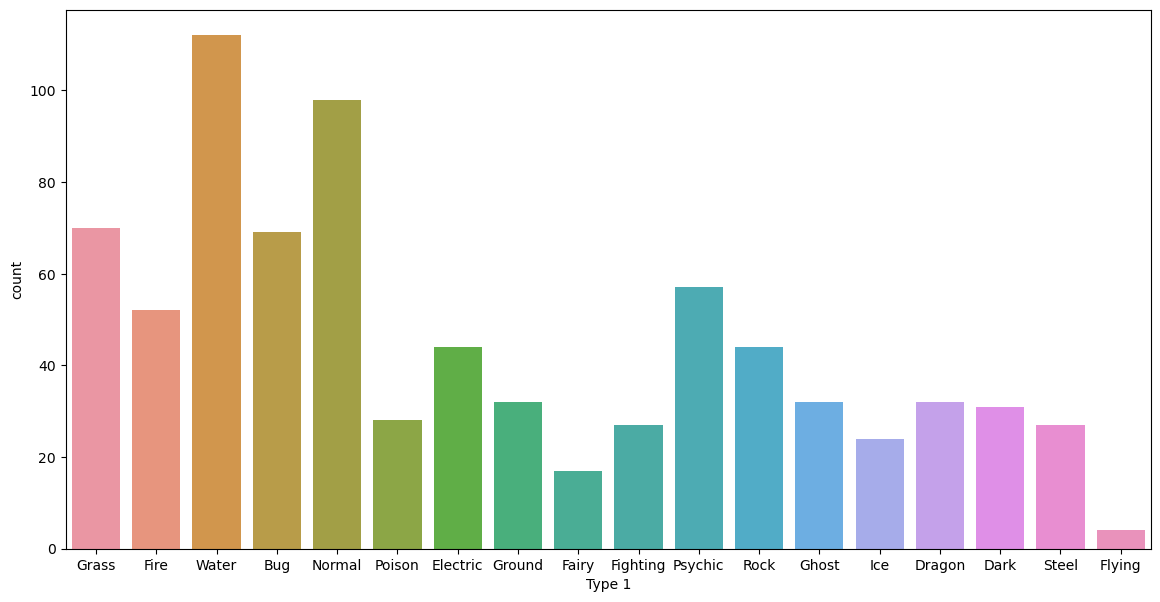

In [14]:
plt.figure(figsize=(14,7))

sns.countplot(x=df['Type 1'])

### histplot

<AxesSubplot:xlabel='Attack', ylabel='Count'>

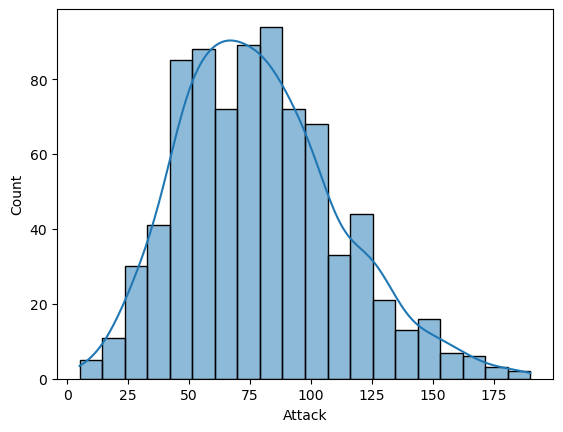

In [5]:
sns.histplot(df['Attack'],kde=True)  # kde = estimate the pdf

### boxplot
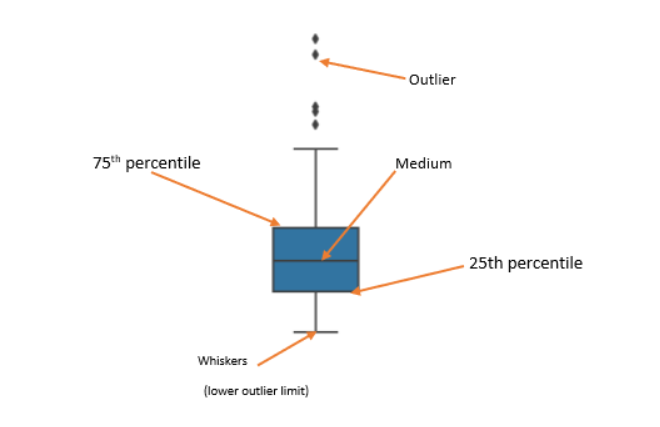

<AxesSubplot:xlabel='Attack'>

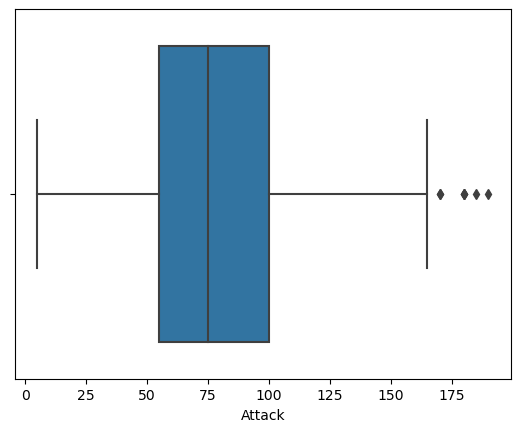

In [6]:
sns.boxplot(x=df['Attack'])

<AxesSubplot:>

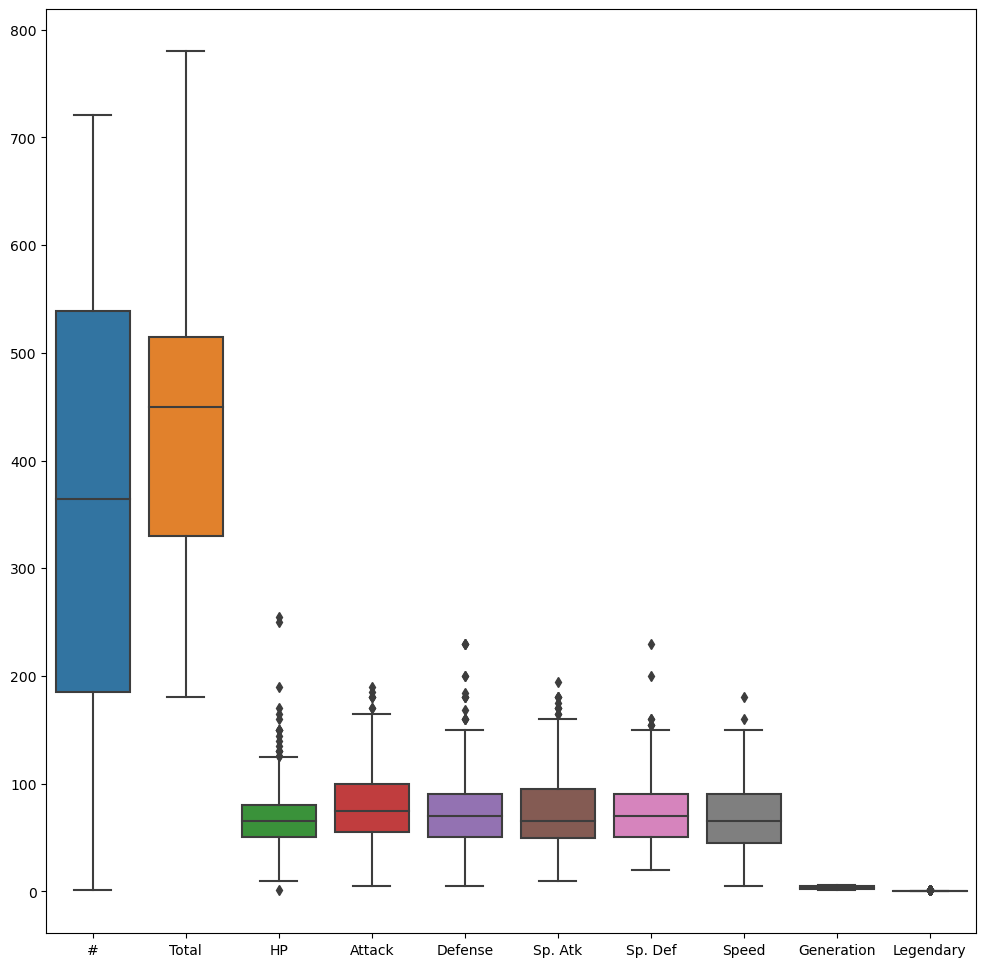

In [7]:
plt.figure(figsize=(12,12))
sns.boxplot(data=df)

### pie chart

Text(0.5, 1.0, 'Percentage of Different Types of Pokemon')

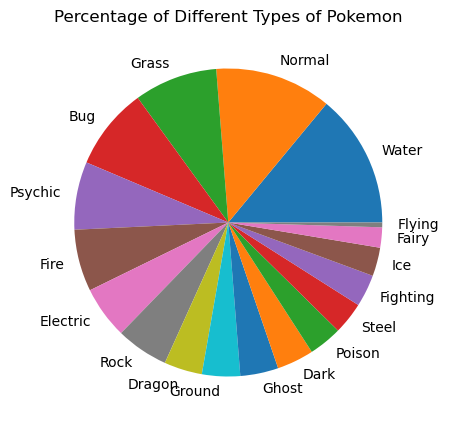

In [8]:
type_series=df['Type 1'].value_counts()

labels = type_series.index
values=  type_series.values

plt.figure(figsize=(5,5))
plt.pie(values, labels=labels)
plt.title("Percentage of Different Types of Pokemon")


### violinplot
- plots according to the density of a region
- parts of the plot where the width is thicker denotes a region with higher density points

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

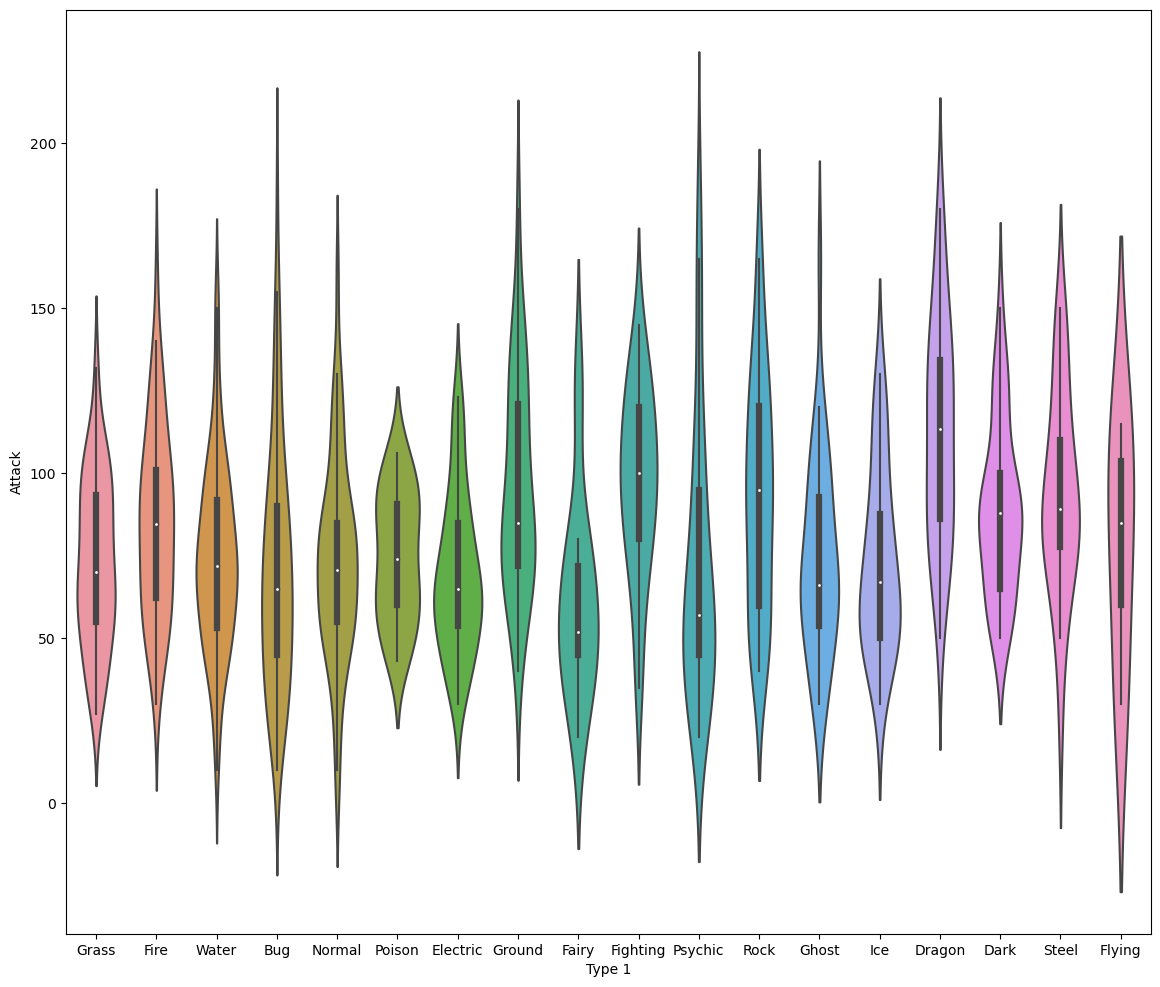

In [9]:
plt.figure(figsize=(14,12))

sns.violinplot(x=df['Type 1'],y=df['Attack'])

### heatmap
- for example for the pearson-correlation

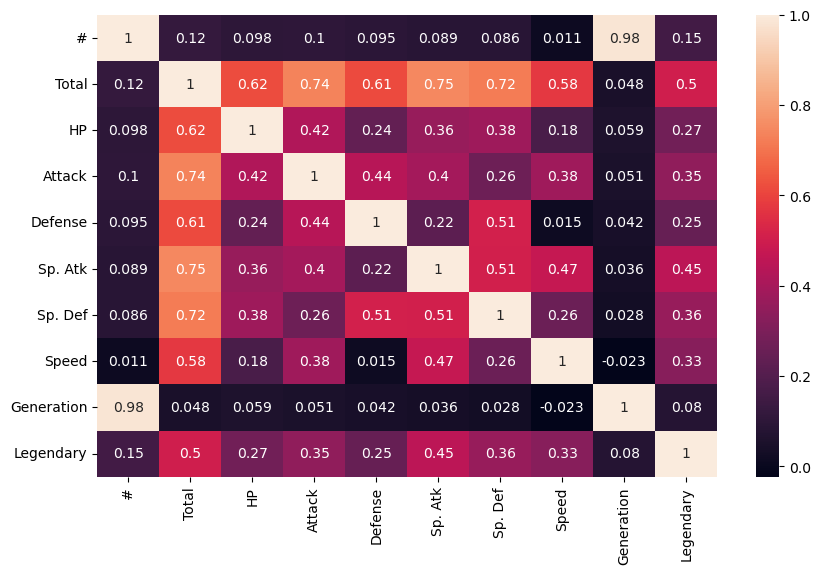

In [10]:
plt.figure(figsize=(10,6)) #manage the size of the plot
sns.heatmap(df.corr(),annot=True) 
plt.show()